# ***Retrieval-Augmented Generation (RAG) and LangChain: A Comprehensive Guide***


## Limitations of Traditional LLMs and Transformers

- *Static Knowledge*: Their knowledge is static – locked in at training time – so they cannot automatically incorporate new facts or updates. ⏳

- *Hallucination Issue*: LLMs often hallucinate, generating plausible but incorrect or fabricated information when asked about facts they haven’t seen. 🤔💭

- *Lack of Grounding*: They lack grounding in real data, as their outputs are not linked to verifiable sources. 📉

- *Finite Context Window*: LLMs can only process a limited number of tokens at once, which restricts their ability to reason over large documents or databases in a single prompt. 📄🔍

- Example of Limitations: Even a 2-million-token context (about 3,400 pages) is limited and may only cover a few long documents. 📚

- Struggles with Queries: Off-the-shelf LLMs can struggle with up-to-date or domain-specific queries and may provide confident-sounding but unreliable answers without an external knowledge mechanism. ⚠️


## 🤔 ***What is Retrieval-Augmented Generation (RAG)?***

>> Retrieval-Augmented Generation (RAG) is a method that combines LLMs with external data sources to overcome these limitations

> RAG system retrieves relevant information from a knowledge base at query time and feeds that context into the LLM

In practice, when a user asks a question, the system follows these steps:

- **Retriever Usage**: 
  - The system first uses a **retriever** (often a vector-based semantic search) to find pertinent documents or passages. 🕵️‍♂️
  
- **Passage Injection**: 
  - These retrieved passages are then **included** (or **injected**) into the prompt sent to the language model. This guides the model to generate an answer that is grounded in fresh information. 📥

- **RAG Explanation**: 
  - As LangChain’s documentation explains, **RAG** (Retrieval-Augmented Generation) "**bridges the gap between vast language models and dynamic, targeted information retrieval**"


### ***Why RAG matters***

- This hybrid approach provides several crucial benefits. By attaching real evidence from a knowledge base, RAG keeps model responses current and factual, even about recent events or niche domains. It imbues the system with domain-specific expertise by querying specialized corpora. Most importantly, grounding outputs in retrieved facts reduces hallucinations, since the LLM is directly using verified information to answer
-  Moreover, RAG is often more cost-effective than retraining or fine-tuning a large model for every new knowledge update
python.langchain.com
- In short, RAG enhances LLMs with real-time, relevant data, making AI assistants and QA systems more accurate and reliable

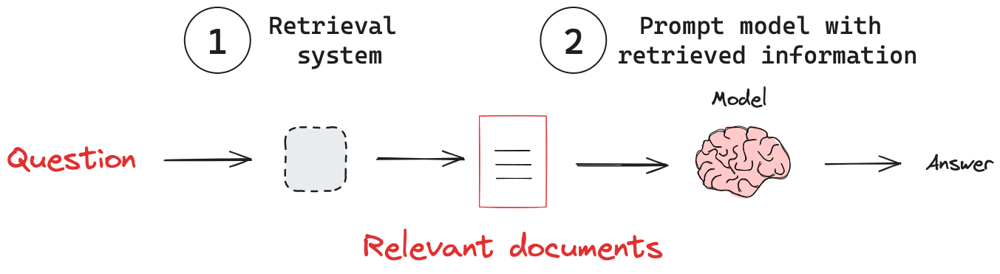

In [2]:
from IPython.display import Image, display

display(Image(filename=r'C:\Users\kanha\Desktop\GenAI\RAG_langchain\rag_image.png'))

Figure: A simplified RAG pipeline. A user query goes to a retrieval system that fetches relevant documents, which are then fed (along with the query) into a language model to generate an answer.

## **RAG Pipeline Overview** 🔄

- **Two Phases**:
  - **Retrieval**: 
    - Documents are pre-processed and stored in a **vector store**. 📂
    - Each document (or chunk) is converted into an **embedding vector** capturing its semantic content. 🔍
    - An **embedding model** (e.g., transformer encoders) maps text into a numerical vector space. 📊
    - The vector store indexes these vectors for efficient similarity searches. ⚙️
  
  - **Query Processing**:
    - At query time, the user's question is embedded using the same model. ❓
    - A **similarity search** is performed on the vector store, returning the most similar document vectors and their texts. 📑
    - Some systems may use **sparse methods** (e.g., BM25) or hybrid search techniques for improved recall. 🛠️

- **Generation**:
  - Relevant passages are combined with the original query and passed to the **generator** (the language model). 🔄
  - The prompt typically follows this format: 
    ```
    Question: [user’s query]. Context: [retrieved text]. Answer:
    ```
  - This approach injects new knowledge into the LLM at runtime, enhancing its output. 💡
  
- **Output**:
  - The LLM’s response is informed by both its pre-trained parameters and the specific facts from the knowledge base, allowing it to cite or reflect external information. 📝

## **Evolution and Growth of RAG-based Approaches** 📈

- **Timeline**:
  - **2020**: RAG formalized in research (notably by Meta AI on knowledge-intensive NLP). 🧠
  - **2023-2024**: Rapid adoption in industry and open source; emergence of various RAG tools and frameworks (e.g., Haystack, LlamaIndex, LangChain). ⚙️
  
- **2024: The “Year of RAG”**:
  - Leading LLMs featured longer context windows and enhanced capabilities. 🚀
  - Practitioners recognized **hybrid RAG solutions** as advantageous. 💡
  - By early 2024, RAG demonstrated clear benefits in cost and real-time performance, with minor differences in effectiveness compared to fine-tuning. 💰

- **Technical Advances (2024-2025)**:
  - Improved retrieval strategies combining **sparse BM25** and **dense vector search**. 🔍
  - Introduction of **multi-hop** and **query-expansion techniques** (e.g., rewriting queries for broader evidence). 🔄
  - Support for **multimodal RAG** (retrieving from images, tables, etc.). 🖼️
  - Introduction of **GraphRAG** by Microsoft: integrating knowledge graph construction to handle complex queries via entity relationships. 🌐

- **Emergence of Open-Source Engines**:
  - Major RAG engines like **RAGFlow** bundled best practices (e.g., semantic chunking, hybrid search). 🛠️

- **Trends and Key Lessons**:
  - Shift towards more **scalable** and **robust RAG systems** suitable for enterprise-scale data. 📊
  - Key lessons from 2024:
    - Utilize **hybrid retrieval** (vector + keyword).
    - Carefully **preprocess** and **chunk data**.
    - Leverage specialized RAG variants for reasoning. 🔑
  
- **Maturation of RAG**:
  - Standard RAG (retrieve + generate) evolved into a toolkit of design patterns for knowledge-grounded AI. 🤖

## **The LangChain Framework** 🛠️

### **Concept and Architecture**:
- **Overview**:
  - Open-source framework for developing LLM-powered applications. 🌐
  - Modular “orchestration engine” that integrates prompts, data sources, LLM calls, and logic. 🔗

- **Core Components**:
  - **langchain-core**: Lightweight package defining base abstractions (chat models, vector stores, tools) without integrations. 📦
  - **Main langchain package**: Provides generic components (Chains, Agents, Retrieval strategies) that are model-agnostic. 🔄
  - **Specific Integrations**: Packages for OpenAI, Anthropic, vector databases, etc., plug into core interfaces. 🔌

- **Additional Tools**:
  - **LangGraph**: For graph-based multi-step workflows. 📊
  - **LangServe**: Deploys chains as APIs. 🌍
  - **LangSmith**: Developer platform for testing and monitoring chains. 🧪

- **RAG Support**:
  - Rich component composition: Chains, Retrievers, PromptTemplates, and Memory modules. 🧩
  - Built-in chain types for common tasks (e.g., question-answering, summarization). 📝
  - Tools/Agents allow LLM to call external functions. ⚙️

### **Building RAG Pipelines with LangChain**:
- **Simplified Complexity**:
  - Automatic handling of retrieved document texts with questions in RetrievalQA chains. 🤖
  - Uniform interface for vector database connectors (Chroma, Pinecone, FAISS). 🔄
  
- **Advanced Features**:
  - Supports multiple retrievers, custom filters, and rerankers. 🔍
  - ConversationalRetrievalChain manages chat history and context. 💬
  - Encourages best practices with LangChain Expression Language (LCEL) for graph-like composition. 📈

- **Debugging and Logging**:
  - Integration with LangSmith for logging every step (queries, retrieved docs, prompts). 📝
  
- **Efficiency**:
  - Reduces boilerplate code: Instantiates and connects chain components instead of manual coding. 🛠️
  - Focuses on high-level design over low-level plumbing. 🔧

### **Comparison to Other RAG Tools**:
- **LlamaIndex**:
  - Focuses on data ingestion and indexing; excels at building fast indexes for LLM queries. 📚
  - Often used as a retrieval layer with LangChain for larger workflows. 🔗

- **Haystack**:
  - Mature RAG framework built around Elasticsearch/BM25 and Hugging Face models. 📊
  - Modular pipeline for document stores, retrievers, readers, and generators; geared towards high-performance QA systems. 🏆

- **LangChain**:
  - More general-purpose; supports QA, chatbots, agents with tools, and multi-step reasoning. 🌍
  - Abstracts complexity of building RAG systems; lowers barrier to entry with fewer lines of glue code. 🚀

### **Conclusion**:
- **Strengths**:
  - LlamaIndex: Seamless data indexing and quick retrieval. 📈
  - Haystack: Scalable QA pipelines. 🏆
  - LangChain: Flexible LLM application orchestration with built-in best practices. 🔧

## **Design Patterns in LangChain RAG Applications** 🛠️

### **Common Architectural Patterns**:

1. **Retrieve-then-Answer (RetrievalQA) Chain**:
   - User query triggers document retrieval. 📄
   - LLM produces an answer based on retrieved documents. 🧠
   - Can be adapted for conversational settings using a memory buffer, forming a **ConversationalRetrievalChain**. 💬

2. **Map-Reduce for Long Content**:
   - Documents are split into chunks. 🪣
   - Each chunk is processed (mapped) by the LLM (e.g., extracting relevant information). 🔍
   - Results are combined (reduced) to form a final answer. ➕
   - LangChain provides built-in support with **MapReduceDocumentsChain**. 🔗

3. **Advanced Patterns**:
   - **Multi-Query/Query Expansion**:
     - LLM rewrites the question in multiple ways to retrieve diverse answers. 🔄
   - **RAG-Fusion**:
     - Combines results from different retrieval methods for richer responses. 🌐

4. **Agent Mechanism**:
   - For complex queries, the LLM can decide to call tools or perform multiple retrieval steps. 🎛️

5. **Domain-Specific Patterns**:
   - **Iterative Retrieval**: Ask and retrieve, then ask again for refinement. 🔄
   - **Hybrid Search**: Combines vector and keyword filtering for enhanced retrieval. 🔍

### **LangChain Philosophy**:
- **Modular and Explicit RAG Pipelines**:
  - Design directed graphs of components (chains calling other chains, retrievers, etc.). 🛠️
  - Clarity allows experimentation with strategies (e.g., adding retrievers, trying reranking). 🔄

- **Focus on Application Intent**:
  - Many details (prompt formatting, batching, caching) are handled by LangChain. 🧩
  - Developers can concentrate on the application's intent rather than boilerplate code. 🚀

### **Conclusion**:
- LangChain simplifies the design and implementation of RAG systems by providing reusable components and clear abstractions, making it easier to build, modify, and experiment with complex workflows. 🌟


---

# 🧠✨ Fine-Tuning in Machine Learning & LLMs

---

## 🧩 What is Fine-Tuning?

> **Fine-tuning** is the process of taking a pre-trained model and training it further on a **specific dataset or domain**, to adapt it for a **targeted task or domain**.

Think of it like teaching a fluent English speaker how to use medical vocabulary — they already know the language, but now you train them on a specific field.

---

## 🎯 Why Fine-Tuning?

✅ Transfer learning benefits  
✅ Faster than training from scratch  
✅ Requires fewer data  
✅ Customizes to domain/task  
✅ Improves performance over generic models for specialized tasks

---

## 🔍 Where is Fine-Tuning Used?

- 🗣️ Chatbots in healthcare, finance, legal, etc.  
- 🤖 Domain-specific LLMs (e.g., FinGPT, BioGPT)  
- 🧾 Sentiment analysis in retail/brands  
- 🛡️ Security and compliance in internal enterprise data  
- 📈 Custom predictions in time series/finance  

---

## 🧪 Types of Fine-Tuning

### 1. 🧼 **Full Fine-Tuning**
- Updates **all layers** of the model.
- Most accurate, but **computationally expensive**.
- Requires large compute (e.g., GPUs/TPUs)

### 2. 🪡 **Parameter-Efficient Fine-Tuning (PEFT)**

#### a. LoRA (Low-Rank Adaptation)
- Adds trainable low-rank matrices.
- Reduces memory usage drastically.

#### b. Prefix Tuning
- Keeps model weights frozen.
- Adds trainable “prefix” vectors to attention layers.

#### c. Adapter Tuning
- Inserts small MLP modules (adapters) into model layers.
- Only adapters are updated.

#### d. BitFit
- Only fine-tunes the **bias** parameters of the model.

---

## ⚙️ Fine-Tuning vs Prompt Engineering

| Feature              | Fine-Tuning                          | Prompt Engineering                    |
|----------------------|--------------------------------------|----------------------------------------|
| 🧠 Customization     | Deep (model internals)               | Shallow (input only)                   |
| 🔁 Reusability       | Task-specific                        | Highly reusable                        |
| 💻 Compute Cost      | High                                 | Low                                    |
| 📦 Deployment Size   | Larger (custom weights)              | Same model                             |

---

## 🧰 Tools & Frameworks

- 🤗 Hugging Face Transformers (`Trainer`, `PEFT`, `accelerate`)
- 🔬 OpenAI Fine-Tuning API (`gpt-3.5-turbo`)
- 🔧 LoRA, QLoRA, PEFT libraries
- 🧪 Google’s T5, FLAN-T5 for task adaptation
- 🦜 LangChain + OpenAI or Cohere for retrieval + fine-tuned agents

---

# 🔍 Supervised vs Unsupervised Fine-Tuning

---

## 🧑‍🏫 Supervised Fine-Tuning

In **supervised fine-tuning**, the model is trained on **labeled data**: input-output pairs.

### 📌 Examples:
- Text ➡️ Sentiment label  
- Prompt ➡️ Completion  
- Question ➡️ Answer  
- Input ➡️ Classification/Regression target

### ✅ Use Cases:
- Chatbot trained on customer query-response logs  
- Legal document classification  
- Medical diagnosis prediction  
- Fine-tuning GPT on your own instruction/response pairs

### 📦 Data Format (OpenAI-style JSONL):
```json
{"prompt": "What is the refund policy?", "completion": " Our refund policy allows returns within 30 days."}


| Feature               | Supervised Fine-Tuning               | Unsupervised Fine-Tuning             |
| --------------------- | ------------------------------------ | ------------------------------------ |
| 📚 Requires labels    | ✅ Yes                                | ❌ No                                 |
| 🎯 Training goal      | Task-specific (e.g., Q\&A, classify) | Language modeling or domain adaption |
| 🧰 Model update scope | Narrow (specific task)               | Broad (language/style understanding) |
| 🧠 Example tasks      | Instruction tuning, summarization    | Domain adaptation, style modeling    |


## 🧠 ***Unsupervised Fine-Tuning***

>> In unsupervised fine-tuning, the model learns from raw text — no labels or prompts.
This is often used for domain adaptation or continued pretraining.
---

📌 Examples:
- Training on internal company emails/documents
- Fine-tuning GPT on healthcare-specific notes
- Feeding raw customer chats to better model the language of your users

### 🔁 Objective:
Typically, next-token prediction or masked token prediction (like BERT)

### 🛠️ Technique:
- Continue pretraining with a domain corpus using:
- Masked LM loss (e.g., BERT-style)
- Causal LM loss (e.g., GPT-style)



🧪 Hybrid Approach: Instruction Tuning
Sometimes, instruction tuning is done with semi-supervised data — prompts are human-written, responses are model-generated + filtered.

This sits between supervised and unsupervised fine-tuning.

✅ Popular Models:
- FLAN-T5 (Google)
- Dolly (Databricks)
- OpenAssistant (LAION)



# 🧠 In-Context Learning (ICL) in Large Language Models

---


## 🤔 What is In-Context Learning?

**In-Context Learning** is the ability of a large language model (LLM) to **learn a task from examples provided in the prompt**, without updating any model weights.

> ✅ No gradient updates  
> ✅ No fine-tuning required  
> ✅ Just provide examples in the input text!

---

## 📋 How It Works

You **give the model a few examples** ("demonstrations") directly in the prompt. Then you **ask it to complete a new instance**.

### 🧾 Format:
Input: Example 1 ➡️ Output 1
Input: Example 2 ➡️ Output 2
Input: ??? ➡️ Output: ???



> The model “learns” the pattern just from the structure of the examples.

---

## 💡 Example: Sentiment Classification

Review: "I loved the movie!"
Sentiment: Positive

Review: "It was a terrible experience."
Sentiment: Negative

Review: "The plot was boring."
Sentiment:


The LLM infers that it needs to classify sentiment based on prior patterns.

---

## 🧪 Types of In-Context Learning

| Type                | Description                                      | Also Called                |
|---------------------|--------------------------------------------------|----------------------------|
| **Zero-shot**       | No examples, just instructions                   | Prompt-only                |
| **One-shot**        | One example provided                             | Few-shot (n=1)             |
| **Few-shot**        | 2-5+ examples shown in prompt                    | Prompt tuning              |
| **Chain-of-Thought**| Examples include reasoning steps                 | Reasoning prompts          |
| **CoT + Few-shot**  | Few-shot + Step-by-step reasoning                | Explain-then-predict       |

---

## 🔄 Comparison: ICL vs Fine-Tuning

| Feature            | In-Context Learning     | Fine-Tuning                   |
|--------------------|-------------------------|-------------------------------|
| 🧠 Model Weights    | Frozen (not changed)    | Updated                       |
| 💾 Persistence      | Temporary (per prompt)  | Permanent (model checkpoint)  |
| 🔧 Effort Required  | Low (no training needed)| High (training required)      |
| 🔍 Data Used        | Few examples            | Large labeled dataset         |
| ⚡ Speed            | Instant                 | Slower (requires training)    |


---

## 🧠 Why It Works (Surprisingly Well!)

- Emerges in models ≥13B parameters
- LLMs “simulate” learning by pattern matching and generalization
- They internally infer a task from **format + wording + patterns**

> 📌 It's not real learning — it’s sophisticated pattern completion!

---

## 🔥 Applications

- Prompt engineering  
- Language translation  
- Code generation (e.g., GitHub Copilot)  
- Reasoning tasks (with CoT prompting)  
- Custom task prototyping (without fine-tuning!)

---
